**Dataset Exploration**

In [1]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import tensorflow as tf
from tensorflow import keras

In [2]:
# Files and directories
import os

dataset_dir = '/content/drive/MyDrive/Yoga/YogaData'
files = os.listdir(dataset_dir)
print("Files and directories in the dataset:", files)

Files and directories in the dataset: ['Valid', 'Train', 'Test']


In [3]:
# Number of files in each directory
import os

# path to the dataset
dataset_dir = '/content/drive/MyDrive/Yoga/YogaData'

# paths to training, testing and validation directories
train_dir = os.path.join(dataset_dir, '/content/drive/MyDrive/Yoga/YogaData/Train')
test_dir = os.path.join(dataset_dir, '/content/drive/MyDrive/Yoga/YogaData/Test')
val_dir = os.path.join(dataset_dir, '/content/drive/MyDrive/Yoga/YogaData/Valid')

# List the files in the training directory
train_files = os.listdir(train_dir) # Use the train_dir variable here
print("Number of training data files:", len(train_files))

# List the files in the testing directory
test_files = os.listdir(test_dir) # Use the test_dir variable here
print("Number of testing data files:", len(test_files))

# List the files in the validation directory
val_files = os.listdir(val_dir) # Use the val_dir variable here
print("Number of validating data files:", len(val_files))

Number of training data files: 10
Number of testing data files: 10
Number of validating data files: 10


In [4]:
# Total number of images in each files and total number of images in the directory
import os

# path to the dataset
dataset_dir = '/content/drive/MyDrive/Yoga/YogaData'

# paths to training, testing, and validation directories
train_dir = os.path.join(dataset_dir, 'Train')
test_dir = os.path.join(dataset_dir, 'Test')
val_dir = os.path.join(dataset_dir, 'Valid')

# Get total number of images in the training directory and its subdirectories
total_train_files = 0
for root, dirs, files in os.walk(train_dir):
    total_train_files += len(files)
print("Total number of training data files:", total_train_files)

# Get total number of images in the testing directory and its subdirectories
total_test_files = 0
for root, dirs, files in os.walk(test_dir):
    total_test_files += len(files)
print("Total number of testing data files:", total_test_files)

# Get total number of images in the validation directory and its subdirectories
total_val_files = 0
for root, dirs, files in os.walk(val_dir):
    total_val_files += len(files)
print("Total number of validating data files:", total_val_files)

# Get total number of images in the entire dataset
total_images = total_train_files + total_test_files + total_val_files
print("Total number of images in the dataset:", total_images)

Total number of training data files: 2492
Total number of testing data files: 351
Total number of validating data files: 676
Total number of images in the dataset: 3519


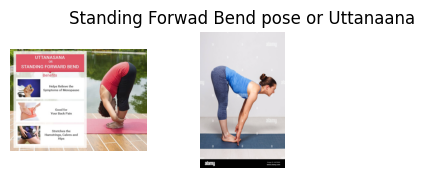

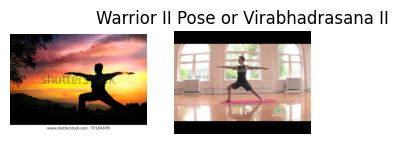

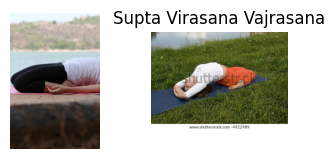

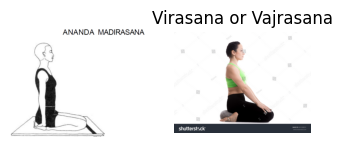

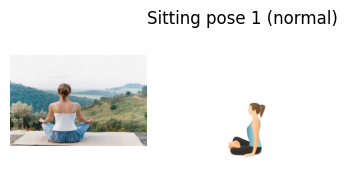

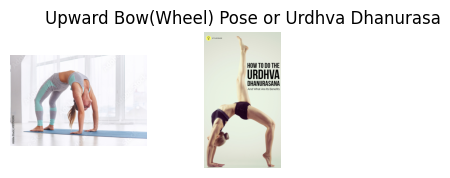

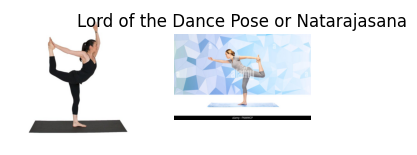

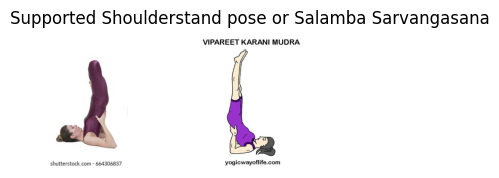

In [14]:
import os
import random
import matplotlib.pyplot as plt

def plot_class_images(class_dir, num_images=2):
  images = os.listdir(class_dir)
  random.shuffle(images)

  plt.figure(figsize=(6, 6))
  for i in range(num_images):
    img_path = os.path.join(class_dir, images[i])
    img = plt.imread(img_path)
    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.axis('off')
  plt.title(class_dir.split('/')[-1])  # Extract class name from directory
  plt.show()

# Path to your dataset
dataset_dir = '/content/drive/MyDrive/Yoga/YogaData/Train'

# Get a list of class directories
class_dirs = os.listdir(dataset_dir)

# Display images for the first 8 classes
for class_dir in class_dirs[:8]:
  class_path = os.path.join(dataset_dir, class_dir)
  plot_class_images(class_path)

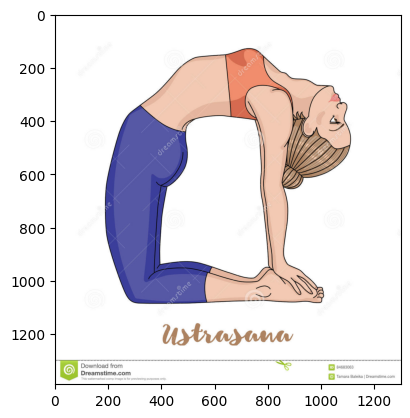

In [9]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# to view an image in a directory
image_path = '/content/drive/MyDrive/Yoga/YogaData/Train/Camel Pose or Ustrasana/Camel_Pose_or_Ustrasana__image_10.jpg'
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()

In [15]:
# to count images in each class
def count_images_per_class(directory):

  class_counts = {}
  for root, _, files in os.walk(directory):
    class_name = os.path.basename(root)
    if class_name:
      image_count = len(files)
      class_counts[class_name] = image_count
  return class_counts

# path to training and testing
train_dir = '/content/drive/MyDrive/Yoga/YogaData/Train'
test_dir = '/content/drive/MyDrive/Yoga/YogaData/Test'

train_class_counts = count_images_per_class(train_dir)
test_class_counts = count_images_per_class(test_dir)

print("Training set class counts:")
print(train_class_counts)

print("\nTesting set class counts:")
print(test_class_counts)


Training set class counts:
{'Train': 0, 'Standing Forwad Bend pose or Uttanaana': 274, 'Warrior II Pose or Virabhadrasana II': 218, 'Supta Virasana Vajrasana': 226, 'Virasana or Vajrasana': 275, 'Sitting pose 1 (normal)': 350, 'Upward Bow(Wheel) Pose or Urdhva Dhanurasa': 217, 'Lord of the Dance Pose or Natarajasana': 290, 'Supported Shoulderstand pose or Salamba Sarvangasana': 193, 'Supta Baddha Konasana': 219, 'Camel Pose or Ustrasana': 230}

Testing set class counts:
{'Test': 0, 'Upward Bow (Wheel) Pose or Urdhva Dhanurasana': 35, 'Virasana or Vajrasana': 32, 'Supta Baddha Konasana': 30, 'Supported Shoulderstand pose or Salamba Sarvangasana': 24, 'Supta Virasana Vajrasana': 34, 'Camel Pose or Ustrasana': 34, 'Warrior II Pose or Virabhadrasana II': 32, 'Standing Forward Bend pose or Uttanasana': 44, 'Sitting pose 1 (normal)': 50, 'Lord_of_the_Dance_Pose_or_Natarajasana_': 36}


In [25]:

import tensorflow as tf

# Define parameters
train_dir = '/content/drive/MyDrive/Yoga/YogaData/Train'
img_height = 224
img_width = 224
batch_size = 32

train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='training',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2492 files belonging to 10 classes.
Using 1994 files for training.


In [18]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 351 files belonging to 10 classes.


In [19]:
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    validation_split=0.2,
    subset='validation',
    seed=42,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

Found 2492 files belonging to 10 classes.
Using 498 files for validation.


In [20]:
class_names = train_dataset.class_names
num_classes = len(class_names)
print(class_names)

['Camel Pose or Ustrasana', 'Lord of the Dance Pose or Natarajasana', 'Sitting pose 1 (normal)', 'Standing Forwad Bend pose or Uttanaana', 'Supported Shoulderstand pose or Salamba Sarvangasana', 'Supta Baddha Konasana', 'Supta Virasana Vajrasana', 'Upward Bow(Wheel) Pose or Urdhva Dhanurasa', 'Virasana or Vajrasana', 'Warrior II Pose or Virabhadrasana II']


In [23]:
for image_batch, labels_batch in train_dataset.take(1):
  print(image_batch.shape)
  print(labels_batch.shape)

(32, 224, 224, 3)
(32,)


In [24]:
import cv2
import os
import random
def get_image_dimensions(image_path):
  img = cv2.imread(image_path)
  height, width, channels = img.shape
  return height, width, channels
dataset_dir = '/content/drive/MyDrive/Yoga/YogaData/Train'
num_images_per_class = 1
classes = os.listdir(dataset_dir)
selected_classes = random.sample(classes, 10)
for class_name in selected_classes:
  class_dir = os.path.join(dataset_dir, class_name)
  image_paths = os.listdir(class_dir)
  random.shuffle(image_paths)
  selected_images = image_paths[:num_images_per_class]
  for image_file in selected_images:
    image_path = os.path.join(class_dir, image_file)
    height, width, channels = get_image_dimensions(image_path)
    print(f"Image: {image_path}, Dimensions: {height}x{width}x{channels}")

Image: /content/drive/MyDrive/Yoga/YogaData/Train/Supported Shoulderstand pose or Salamba Sarvangasana/Supported_Shoulderstand_pose_or_Salamba_Sarvangasana__image_46.jpg, Dimensions: 750x499x3
Image: /content/drive/MyDrive/Yoga/YogaData/Train/Sitting pose 1 (normal)/Sitting pose 1 (normal)_image_169.jpg, Dimensions: 750x1000x3
Image: /content/drive/MyDrive/Yoga/YogaData/Train/Supta Virasana Vajrasana/Supta_Virasana_Vajrasana_image_72.jpg, Dimensions: 448x816x3
Image: /content/drive/MyDrive/Yoga/YogaData/Train/Supta Baddha Konasana/Supta_Baddha_Konasana__image_163.jpg, Dimensions: 1936x2592x3
Image: /content/drive/MyDrive/Yoga/YogaData/Train/Camel Pose or Ustrasana/Camel_Pose_or_Ustrasana__image_86.jpg, Dimensions: 1083x1300x3
Image: /content/drive/MyDrive/Yoga/YogaData/Train/Virasana or Vajrasana/Virasana_or_Vajrasana_image_245.jpg, Dimensions: 550x550x3
Image: /content/drive/MyDrive/Yoga/YogaData/Train/Lord of the Dance Pose or Natarajasana/Lord_of_the_Dance_Pose_or_Natarajasana__imag

**Data Visualisation**

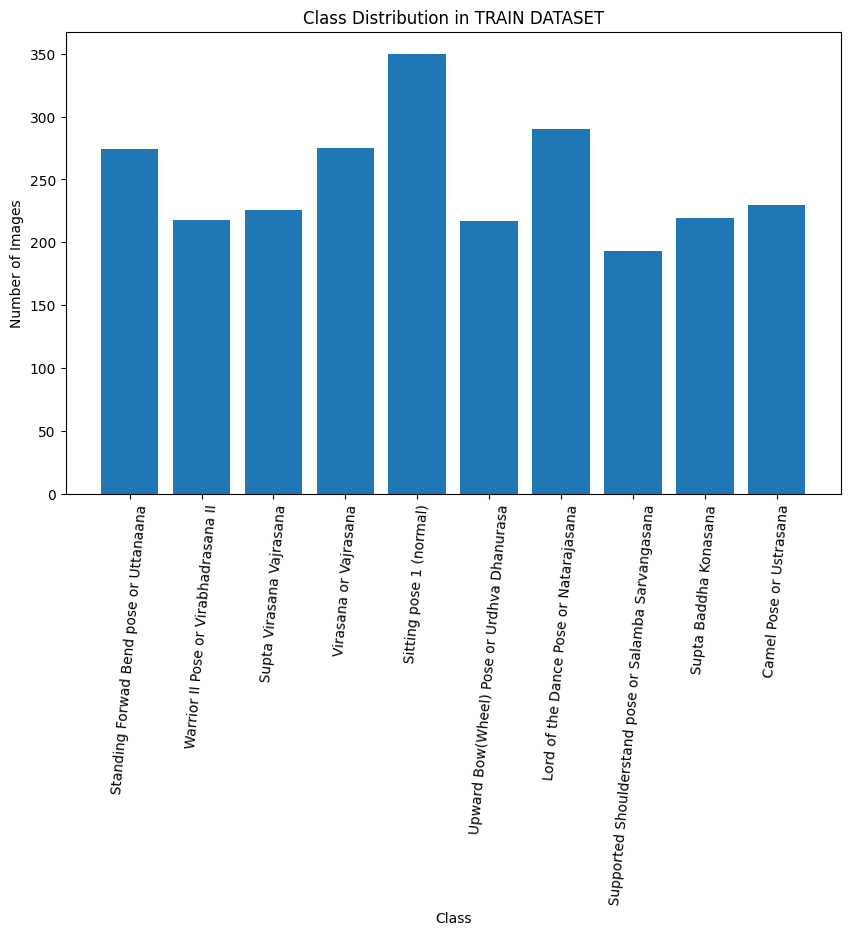

In [37]:
import os
import matplotlib.pyplot as plt

def count_images_in_classes(parent_dir):

    class_counts = {}

    # Iterate over each folder in the parent directory
    for class_folder in os.listdir(parent_dir):
        class_path = os.path.join(parent_dir, class_folder)

        # Check if it is a directory
        if os.path.isdir(class_path):
            # Count the number of images in the class folder
            num_images = len(os.listdir(class_path))
            class_counts[class_folder] = num_images

    return class_counts

# Set the parent directory path for the TRAIN dataset
train_dir = '/content/drive/MyDrive/Yoga/YogaData/Train'

# Get the image counts for each class
train_class_counts = count_images_in_classes(train_dir)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(train_class_counts.keys(), train_class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in TRAIN DATASET')
plt.xticks(rotation=85)
plt.show()

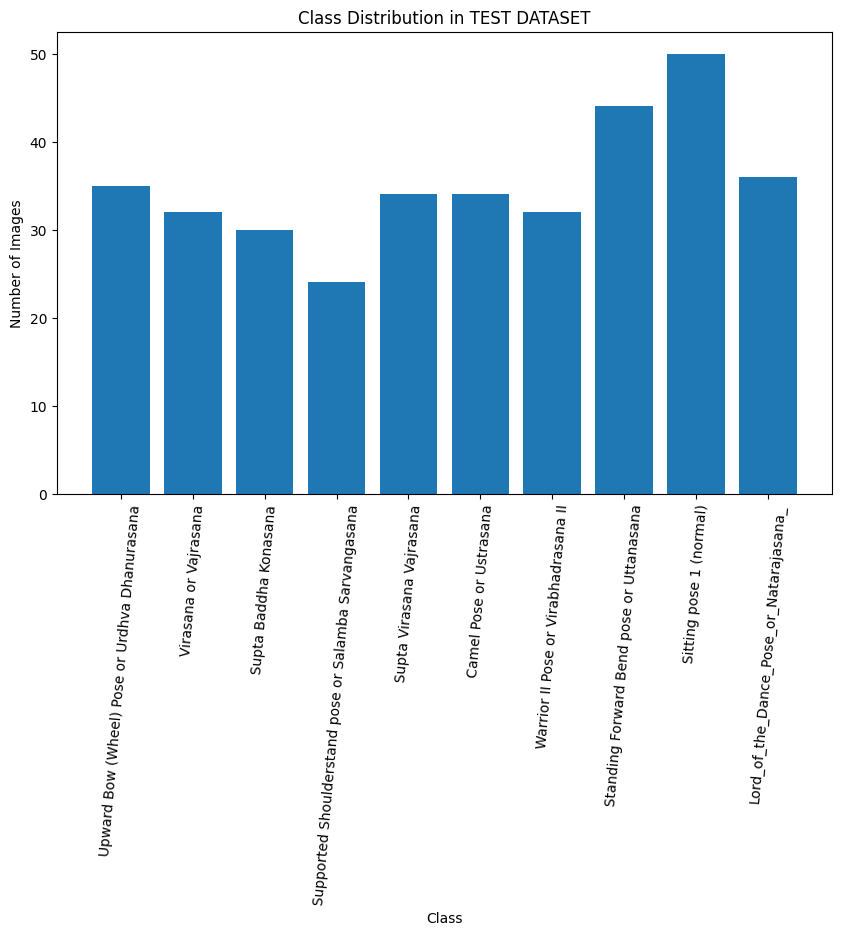

In [38]:
import os
import matplotlib.pyplot as plt

def count_images_in_classes(parent_dir):

    class_counts = {}

    # Iterate over each folder in the parent directory
    for class_folder in os.listdir(parent_dir):
        class_path = os.path.join(parent_dir, class_folder)

        # Check if it is a directory
        if os.path.isdir(class_path):
            # Count the number of images in the class folder
            num_images = len(os.listdir(class_path))
            class_counts[class_folder] = num_images

    return class_counts

# Set the parent directory path for the TEST dataset
test_dir = '/content/drive/MyDrive/Yoga/YogaData/Test'

# Get the image counts for each class
test_class_counts = count_images_in_classes(test_dir)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(test_class_counts.keys(), test_class_counts.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution in TEST DATASET')
plt.xticks(rotation=85)
plt.show()

**Dataset Augmentation**

In [26]:
import os
from PIL import Image

def resize_images_in_directory(input_folder, output_folder, size=(224, 224)):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Walk through the input folder
    for root, dirs, files in os.walk(input_folder):
        # Calculate the relative path for the output folder structure
        relative_path = os.path.relpath(root, input_folder)
        target_output_folder = os.path.join(output_folder, relative_path)

        # Create the corresponding target output folder if it doesn't exist
        if not os.path.exists(target_output_folder):
            os.makedirs(target_output_folder)

        for file in files:
            if file.endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff')):
                file_path = os.path.join(root, file)
                try:
                    with Image.open(file_path) as img:
                        # Resize the image to the desired size
                        img_resized = img.resize(size, Image.LANCZOS)

                        # Convert to RGB if the image is not in 'RGB' mode
                        if img_resized.mode != 'RGB':
                            img_resized = img_resized.convert('RGB')

                        # Save the resized image to the corresponding output folder
                        output_file_path = os.path.join(target_output_folder, file)
                        img_resized.save(output_file_path)

                        print(f"Resized and saved: {output_file_path}")
                except Exception as e:
                    print(f"Error processing file {file}: {e}")

# Example usage:
input_folder = '/content/drive/MyDrive/Yoga/YogaData/Train'  # Path to your 'train' directory
output_folder = '/content/drive/MyDrive/Yoga/YogaData/Train'  # Where to save resized images

# Call the function to resize all images
resize_images_in_directory(input_folder, output_folder, size=(224, 224))


Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Train/Standing Forwad Bend pose or Uttanaana/Standing_Forward_Bend_pose_or_Uttanasana__image_144.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Train/Standing Forwad Bend pose or Uttanaana/Standing_Forward_Bend_pose_or_Uttanasana__image_17.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Train/Standing Forwad Bend pose or Uttanaana/Standing_Forward_Bend_pose_or_Uttanasana__image_120.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Train/Standing Forwad Bend pose or Uttanaana/Standing_Forward_Bend_pose_or_Uttanasana__image_234.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Train/Standing Forwad Bend pose or Uttanaana/Standing_Forward_Bend_pose_or_Uttanasana__image_187.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Train/Standing Forwad Bend pose or Uttanaana/Standing_Forward_Bend_pose_or_Uttanasana__image_221.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Tra

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Train/Standing Forwad Bend pose or Uttanaana/Standing_Forward_Bend_pose_or_Uttanasana__image_129.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Train/Standing Forwad Bend pose or Uttanaana/Standing_Forward_Bend_pose_or_Uttanasana__image_14.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Train/Standing Forwad Bend pose or Uttanaana/Standing_Forward_Bend_pose_or_Uttanasana__image_18.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Train/Standing Forwad Bend pose or Uttanaana/Standing_Forward_Bend_pose_or_Uttanasana__image_170.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Train/Standing Forwad Bend pose or Uttanaana/Standing_Forward_Bend_pose_or_Uttanasana__image_130.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Train/Standing Forwad Bend pose or Uttanaana/Standing_Forward_Bend_pose_or_Uttanasana__image_216.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Trai

/usr/local/lib/python3.10/dist-packages/PIL/TiffImagePlugin.py:900: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Train/Supta Baddha Konasana/Supta_Baddha_Konasana__image_122.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Train/Supta Baddha Konasana/Supta_Baddha_Konasana__image_109.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Train/Supta Baddha Konasana/Supta_Baddha_Konasana__image_120.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Train/Supta Baddha Konasana/Supta_Baddha_Konasana__image_110.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Train/Supta Baddha Konasana/Supta_Baddha_Konasana__image_101.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Train/Supta Baddha Konasana/Supta_Baddha_Konasana__image_126.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Train/Supta Baddha Konasana/Supta_Baddha_Konasana__image_124.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Train/Supta Baddha Konasana/Supta_Baddha_Konasana__image_11.jpg
Resized and saved: /content/drive

In [27]:
import cv2
import os
import random
def get_image_dimensions(image_path):
  img = cv2.imread(image_path)
  height, width, channels = img.shape
  return height, width, channels
dataset_dir = '/content/drive/MyDrive/Yoga/YogaData/Train'
num_images_per_class = 1
classes = os.listdir(dataset_dir)
selected_classes = random.sample(classes, 10)
for class_name in selected_classes:
  class_dir = os.path.join(dataset_dir, class_name)
  image_paths = os.listdir(class_dir)
  random.shuffle(image_paths)
  selected_images = image_paths[:num_images_per_class]
  for image_file in selected_images:
    image_path = os.path.join(class_dir, image_file)
    height, width, channels = get_image_dimensions(image_path)
    print(f"Image: {image_path}, Dimensions: {height}x{width}x{channels}")

Image: /content/drive/MyDrive/Yoga/YogaData/Train/Camel Pose or Ustrasana/Camel_Pose_or_Ustrasana__image_168.jpg, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga/YogaData/Train/Standing Forwad Bend pose or Uttanaana/Standing_Forward_Bend_pose_or_Uttanasana__image_17.jpg, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga/YogaData/Train/Supta Baddha Konasana/Supta_Baddha_Konasana__image_110.jpg, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga/YogaData/Train/Warrior II Pose or Virabhadrasana II/Warrior_II_Pose_or_Virabhadrasana_II__image_43.jpg, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga/YogaData/Train/Lord of the Dance Pose or Natarajasana/Lord_of_the_Dance_Pose_or_Natarajasana__image_186.jpg, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga/YogaData/Train/Supta Virasana Vajrasana/Supta_Virasana_Vajrasana_image_39.jpg, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga/YogaData/Train/Virasana or Vajrasana/Virasana_or_Vajrasana_image_91

In [28]:
import os
from PIL import Image

def resize_images_in_directory(input_folder, output_folder, size=(224, 224)):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Walk through the input folder
    for root, dirs, files in os.walk(input_folder):
        # Calculate the relative path for the output folder structure
        relative_path = os.path.relpath(root, input_folder)
        target_output_folder = os.path.join(output_folder, relative_path)

        # Create the corresponding target output folder if it doesn't exist
        if not os.path.exists(target_output_folder):
            os.makedirs(target_output_folder)

        for file in files:
            if file.endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff')):
                file_path = os.path.join(root, file)
                try:
                    with Image.open(file_path) as img:
                        # Resize the image to the desired size
                        img_resized = img.resize(size, Image.LANCZOS)

                        # Convert to RGB if the image is not in 'RGB' mode
                        if img_resized.mode != 'RGB':
                            img_resized = img_resized.convert('RGB')

                        # Save the resized image to the corresponding output folder
                        output_file_path = os.path.join(target_output_folder, file)
                        img_resized.save(output_file_path)

                        print(f"Resized and saved: {output_file_path}")
                except Exception as e:
                    print(f"Error processing file {file}: {e}")

input_folder = '/content/drive/MyDrive/Yoga/YogaData/Test'
output_folder = '/content/drive/MyDrive/Yoga/YogaData/Test'

# Call the function to resize all images
resize_images_in_directory(input_folder, output_folder, size=(224, 224))


Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Test/Upward Bow (Wheel) Pose or Urdhva Dhanurasana/Upward_Bow_(Wheel)_Pose_or_Urdhva_Dhanurasana__image_328.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Test/Upward Bow (Wheel) Pose or Urdhva Dhanurasana/Upward_Bow_(Wheel)_Pose_or_Urdhva_Dhanurasana__image_344.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Test/Upward Bow (Wheel) Pose or Urdhva Dhanurasana/Upward_Bow_(Wheel)_Pose_or_Urdhva_Dhanurasana__image_333.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Test/Upward Bow (Wheel) Pose or Urdhva Dhanurasana/Upward_Bow_(Wheel)_Pose_or_Urdhva_Dhanurasana__image_347.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Test/Upward Bow (Wheel) Pose or Urdhva Dhanurasana/Upward_Bow_(Wheel)_Pose_or_Urdhva_Dhanurasana__image_339.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Test/Upward Bow (Wheel) Pose or Urdhva Dhanurasana/Upward_Bow_(Wheel)_Pose_or_Urdhva_Dhanurasana__image_

In [29]:
import cv2
import os
import random
def get_image_dimensions(image_path):
  img = cv2.imread(image_path)
  height, width, channels = img.shape
  return height, width, channels
dataset_dir = '/content/drive/MyDrive/Yoga/YogaData/Test'
num_images_per_class = 1
classes = os.listdir(dataset_dir)
selected_classes = random.sample(classes, 10)
for class_name in selected_classes:
  class_dir = os.path.join(dataset_dir, class_name)
  image_paths = os.listdir(class_dir)
  random.shuffle(image_paths)
  selected_images = image_paths[:num_images_per_class]
  for image_file in selected_images:
    image_path = os.path.join(class_dir, image_file)
    height, width, channels = get_image_dimensions(image_path)
    print(f"Image: {image_path}, Dimensions: {height}x{width}x{channels}")

Image: /content/drive/MyDrive/Yoga/YogaData/Test/Camel Pose or Ustrasana/Camel_Pose_or_Ustrasana__image_312.jpg, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga/YogaData/Test/Lord_of_the_Dance_Pose_or_Natarajasana_/Lord_of_the_Dance_Pose_or_Natarajasana__image_396.jpg, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga/YogaData/Test/Supta Virasana Vajrasana/Supta_Virasana_Vajrasana_image_319.jpg, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga/YogaData/Test/Supported Shoulderstand pose or Salamba Sarvangasana/Supported_Shoulderstand_pose_or_Salamba_Sarvangasana__image_274.jpg, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga/YogaData/Test/Standing Forward Bend pose or Uttanasana/Standing_Forward_Bend_pose_or_Uttanasana__image_436.jpg, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga/YogaData/Test/Warrior II Pose or Virabhadrasana II/Warrior_II_Pose_or_Virabhadrasana_II__image_333.jpg, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga/YogaD

In [30]:
import os
from PIL import Image

def resize_images_in_directory(input_folder, output_folder, size=(224, 224)):
    # Ensure the output folder exists
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Walk through the input folder
    for root, dirs, files in os.walk(input_folder):
        # Calculate the relative path for the output folder structure
        relative_path = os.path.relpath(root, input_folder)
        target_output_folder = os.path.join(output_folder, relative_path)

        # Create the corresponding target output folder if it doesn't exist
        if not os.path.exists(target_output_folder):
            os.makedirs(target_output_folder)

        for file in files:
            if file.endswith(('png', 'jpg', 'jpeg', 'bmp', 'tiff')):
                file_path = os.path.join(root, file)
                try:
                    with Image.open(file_path) as img:
                        # Resize the image to the desired size
                        img_resized = img.resize(size, Image.LANCZOS)

                        # Convert to RGB if the image is not in 'RGB' mode
                        if img_resized.mode != 'RGB':
                            img_resized = img_resized.convert('RGB')

                        # Save the resized image to the corresponding output folder
                        output_file_path = os.path.join(target_output_folder, file)
                        img_resized.save(output_file_path)

                        print(f"Resized and saved: {output_file_path}")
                except Exception as e:
                    print(f"Error processing file {file}: {e}")

input_folder = '/content/drive/MyDrive/Yoga/YogaData/Valid'
output_folder = '/content/drive/MyDrive/Yoga/YogaData/Valid'
# Call the function to resize all images
resize_images_in_directory(input_folder, output_folder, size=(224, 224))


Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Valid/Warrior II Pose or Virabhadrasana II/Warrior_II_Pose_or_Virabhadrasana_II__image_285.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Valid/Warrior II Pose or Virabhadrasana II/Warrior_II_Pose_or_Virabhadrasana_II__image_300.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Valid/Warrior II Pose or Virabhadrasana II/Warrior_II_Pose_or_Virabhadrasana_II__image_272.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Valid/Warrior II Pose or Virabhadrasana II/Warrior_II_Pose_or_Virabhadrasana_II__image_321.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Valid/Warrior II Pose or Virabhadrasana II/Warrior_II_Pose_or_Virabhadrasana_II__image_287.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Valid/Warrior II Pose or Virabhadrasana II/Warrior_II_Pose_or_Virabhadrasana_II__image_274.jpg
Resized and saved: /content/drive/MyDrive/Yoga/YogaData/Valid/Warrior II Pose or Virabhadrasan

In [31]:
import cv2
import os
import random
def get_image_dimensions(image_path):
  img = cv2.imread(image_path)
  height, width, channels = img.shape
  return height, width, channels
dataset_dir = '/content/drive/MyDrive/Yoga/YogaData/Valid'
num_images_per_class = 1
classes = os.listdir(dataset_dir)
selected_classes = random.sample(classes, 10)
for class_name in selected_classes:
  class_dir = os.path.join(dataset_dir, class_name)
  image_paths = os.listdir(class_dir)
  random.shuffle(image_paths)
  selected_images = image_paths[:num_images_per_class]
  for image_file in selected_images:
    image_path = os.path.join(class_dir, image_file)
    height, width, channels = get_image_dimensions(image_path)
    print(f"Image: {image_path}, Dimensions: {height}x{width}x{channels}")

Image: /content/drive/MyDrive/Yoga/YogaData/Valid/Upward Bow (Wheel) Pose or Urdhva Dhanurasana/Upward_Bow_(Wheel)_Pose_or_Urdhva_Dhanurasana__image_270.jpg, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga/YogaData/Valid/Lord of the Dance Pose or Natarajasana/Lord_of_the_Dance_Pose_or_Natarajasana__image_380.jpg, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga/YogaData/Valid/Warrior II Pose or Virabhadrasana II/Warrior_II_Pose_or_Virabhadrasana_II__image_287.jpg, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga/YogaData/Valid/Camel Pose or Ustrasana/Camel_Pose_or_Ustrasana__image_244.jpg, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga/YogaData/Valid/Virasana or Vajrasana/Virasana_or_Vajrasana_image_319.jpg, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga/YogaData/Valid/Standing Forward Bend pose or Uttanasana/Standing_Forward_Bend_pose_or_Uttanasana__image_366.jpg, Dimensions: 224x224x3
Image: /content/drive/MyDrive/Yoga/YogaData/Valid/Suppo